In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns


# Data display coustomization
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 100)

In [2]:
leads_data_dict = pd.read_excel('Leads Data Dictionary.xlsx', skiprows=2)
leads_data_dict.drop(leads_data_dict.columns[0], axis=1,inplace=True)
leads_data_dict

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identified.
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,TotalVisits,The total number of visits made by the customer on the website.
8,Total Time Spent on Website,The total time spent by the customer on the website.
9,Page Views Per Visit,Average number of pages on the website viewed during the visits.


In [3]:
leadscore = pd.read_csv('Leads.csv')

In [4]:
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


###### There are lot of rows in various categorical columns which have value 'Select' values present in the dataset. `Select` corresponds to the user having not made any selection. So we can replace it with NaN.

In [5]:
leadscore = leadscore.replace('Select', np.nan)

###### Before moving ahead  with EDA, we will define some helper functions which will be used frequently in the rest of the analysis.

In [6]:
### This function will generate a table of features, total NULL values, and %age of NULL values in it.
def findNullValuesPercentage(dataframe):
    totalNullValues = dataframe.isnull().sum().sort_values(ascending=False)
    percentageOfNullValues = round((dataframe.isnull().mean()).sort_values(ascending=False),2)
    featuresWithPrcntgOfNullValues = pd.concat([totalNullValues, percentageOfNullValues], axis=1, keys=['Total Null Values', 'Percentage of Null Values'])
    return featuresWithPrcntgOfNullValues

In [7]:
### this function will create BarPlot for our visualization.

def createCountPlot(keyVariable, plotSize):
    fig, axs = plt.subplots(figsize = plotSize)
    plt.xticks(rotation = 90)
    dataframe = leadscore.copy()
    dataframe[keyVariable] = dataframe[keyVariable].fillna('Missing Values')
    ax = sns.countplot(x=keyVariable, data=dataframe)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/len(dataframe) * 100),
                ha="center") 

In [8]:
#This function will just drop the list of features(inplace) provided to it and print them.
def dropTheseFeatures(features):
    print('Dataset shape before dropping the features {}'.format(leadscore.shape))
    print('*****------------------------------------------*****')
    for col in features:
        print('Removing the column {}'.format(col))
        leadscore.drop(col, axis=1, inplace=True)
    print('*****------------------------------------------*****')
    print('Dataset shape after dropping the features {}'.format(leadscore.shape))

In [9]:
#This function will genrate a table which is populated with feature name and the %age of count of unique values in it.
def genarateUniqueValuePercentagePlot(features):
    cols=4
    rows = len(features)//cols +1
    fig = plt.figure(figsize=(16, rows*5))
    for plot, feature in enumerate(features):
        fig.add_subplot(rows,cols,plot+1)
        ax = sns.countplot(x=leadscore[feature], data=leadscore) 
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/len(leadscore) * 100),
                ha="center") 

In [10]:
### Function to generate heatmaps
def generateHeatmaps(df, figsize):
    plt.figure(figsize = figsize)        # Size of the figure
    sns.heatmap(df.corr(),annot = True, annot_kws={"fontsize":7})


In [11]:
#As the name suggests this function will plot AUC-ROC curve.
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs)
                                            #, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [12]:
def getRegressionMetrics(actual,predicted):
    from sklearn.metrics import precision_score, recall_score
    m={}
    confusion = metrics.confusion_matrix(actual, predicted )
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    m['sensitivity']=TP / float(TP+FN)
    m['specificity']=TN / float(TN+FP)
    m['recall']=recall_score(actual, predicted)
    m['precision']=precision_score(actual, predicted)
    m['accuracy']=metrics.accuracy_score(actual, predicted)
    m['F1-score']=metrics.f1_score(actual, predicted, average='weighted')
    
    print(confusion)
    for metric in m:
        print(metric + ': ' + str(round(m[metric],2)))

### 1.  EDA of Lead Score Dataset

###### We will perform some exploratory data analysis and understand the data better by following the below steps:

- Checking the shape, columns, datatypes etc. of the dataset
- Assessing out of place values
- Checking for duplicate values
- Checking for null values
- Dropping unnecessary columns

In [13]:
leadscore.shape

(9240, 37)

In [14]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

###### We will check the 'Prospect ID' & for 'Lead Number' columns for each datapoint to check for any duplicates.

In [15]:

print(sum(leadscore.duplicated('Prospect ID')) == 0)
print(sum(leadscore.duplicated('Lead Number')) == 0)

True
True


###### The Prospect ID and Lead Number are all unique values and not required for the model building

In [16]:
leadscore.drop(['Prospect ID'], axis=1, inplace=True)

###### A feature with only one unique value is not useful for model building because this feature has zero variance. So we will drop all such clumns.

In [17]:
numUniquesInFeatures = leadscore.nunique().sort_values()
numUniquesInFeatures

Update me on Supply Chain Content                   1
Get updates on DM Content                           1
I agree to pay the amount through cheque            1
Receive More Updates About Our Courses              1
Magazine                                            1
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
A free copy of Mastering The Interview              2
Search                                              2
Newspaper Article                                   2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
What matters most to you in choosing a course       3
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Lead Quality                

In [18]:
dropFeaturesWithSingleVal=[]
for feature in numUniquesInFeatures.index:
#     print(feature, numUniquesInFeatures[feature])
    if numUniquesInFeatures[feature] == 1:
        dropFeaturesWithSingleVal.append(feature)
dropFeaturesWithSingleVal

['Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Receive More Updates About Our Courses',
 'Magazine']

In [19]:
dropTheseFeatures(dropFeaturesWithSingleVal)

Dataset shape before dropping the features (9240, 36)
*****------------------------------------------*****
Removing the column Update me on Supply Chain Content
Removing the column Get updates on DM Content
Removing the column I agree to pay the amount through cheque
Removing the column Receive More Updates About Our Courses
Removing the column Magazine
*****------------------------------------------*****
Dataset shape after dropping the features (9240, 31)


###### Now we check the features with 2 unique values
- A free copy of Mastering The Interview              
- Newspaper Article                                   
- Search                                              
- Through Recommendations                             
- X Education Forums                                  
- Converted (Target Variable)                                     
- Do Not Call                                         
- Do Not Email                                        
- Newspaper                                           
- Digital Advertisement                               

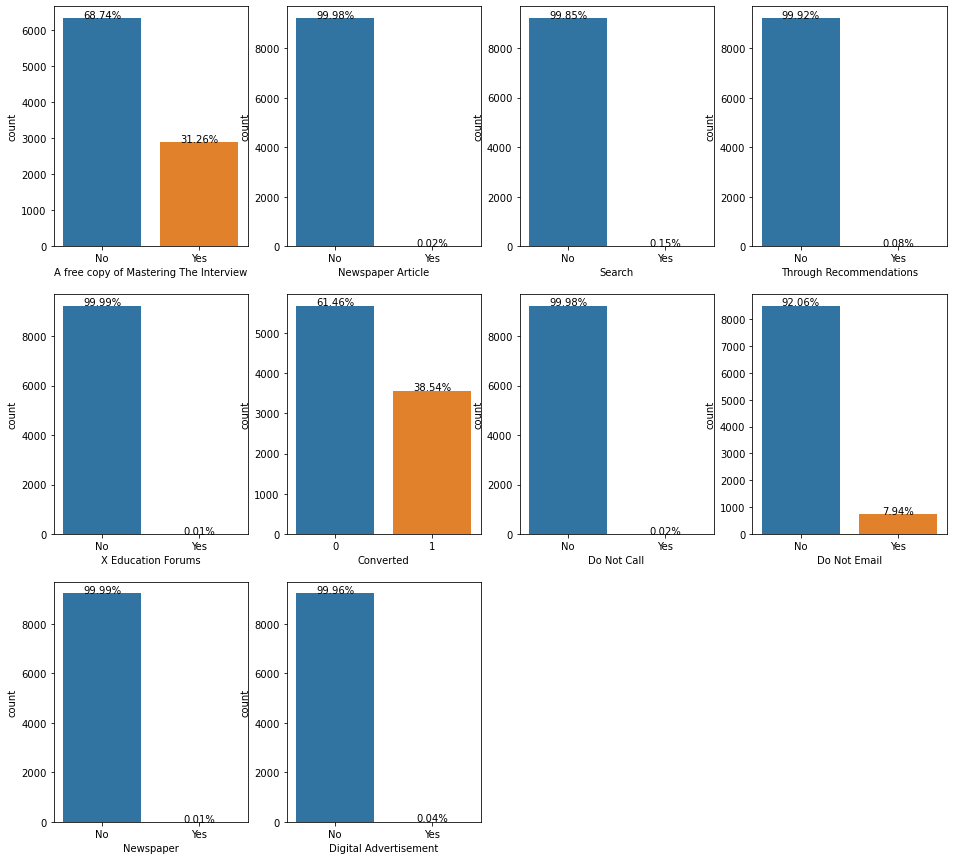

In [20]:
genarateUniqueValuePercentagePlot(['A free copy of Mastering The Interview', 'Newspaper Article', 'Search','Through Recommendations',
             'X Education Forums', 'Converted', 'Do Not Call', 'Do Not Email', 'Newspaper', 'Digital Advertisement'])

###### From the abve plots, we can see that  `A free copy of Mastering The Interview` and `Converted (Target variable)`, all other features are higly skewed. These variables will not help in the model buidling so we will drop these.

In [21]:
dropHighySkewedFeatures = ['Newspaper Article', 'Search','Through Recommendations',
             'X Education Forums', 'Do Not Call', 'Do Not Email', 'Newspaper', 'Digital Advertisement']
dropTheseFeatures(dropHighySkewedFeatures)

Dataset shape before dropping the features (9240, 31)
*****------------------------------------------*****
Removing the column Newspaper Article
Removing the column Search
Removing the column Through Recommendations
Removing the column X Education Forums
Removing the column Do Not Call
Removing the column Do Not Email
Removing the column Newspaper
Removing the column Digital Advertisement
*****------------------------------------------*****
Dataset shape after dropping the features (9240, 23)


######  Now check the NULL values in remaining features.

In [22]:
findNullValuesPercentage(leadscore)

,Total Null Values,Percentage of Null Values
How did you hear about X Education,7250,0.78
Lead Profile,6855,0.74
Lead Quality,4767,0.52
Asymmetrique Profile Score,4218,0.46
Asymmetrique Activity Score,4218,0.46
Asymmetrique Profile Index,4218,0.46
Asymmetrique Activity Index,4218,0.46
City,3669,0.40
Specialization,3380,0.37
Tags,3353,0.36


###### We can see from the above table that `Lead Profile` and `How did you hear about X Education` columns have 74% and above missing values. Also assuming a cut-off of 45% the `Asymmetrique` score and Index features are also on higher side. Imputing these features  So we decide to drop these columns.

In [23]:
dropHighMissingValuesFeatues = ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 
                                'Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index',
                                'Asymmetrique Activity Index']
dropTheseFeatures(dropHighMissingValuesFeatues)

Dataset shape before dropping the features (9240, 23)
*****------------------------------------------*****
Removing the column How did you hear about X Education
Removing the column Lead Profile
Removing the column Lead Quality
Removing the column Asymmetrique Profile Score
Removing the column Asymmetrique Activity Score
Removing the column Asymmetrique Profile Index
Removing the column Asymmetrique Activity Index
*****------------------------------------------*****
Dataset shape after dropping the features (9240, 16)


In [24]:
findNullValuesPercentage(leadscore)

,Total Null Values,Percentage of Null Values
City,3669,0.40
Specialization,3380,0.37
Tags,3353,0.36
What matters most to you in choosing a course,2709,0.29
What is your current occupation,2690,0.29
Country,2461,0.27
Page Views Per Visit,137,0.01
TotalVisits,137,0.01
Last Activity,103,0.01
Lead Source,36,0.00


###### Handling the `Score Variables`. These variables are the ones which were not present with the sales team before making the call. After making the calls the sales team assigned their values to each lead after their discussion. So, in the real scenario these will not be availabe at the time of model building. So we will drop these columns. The score variables in this datasets are:
- Tags
- Lead Quality
- Lead Profile
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score 

###### From the above list, we have already dropped all the features in ealier steps except `Tag` variable.

In [25]:
dropTheseFeatures(['Tags'])

Dataset shape before dropping the features (9240, 16)
*****------------------------------------------*****
Removing the column Tags
*****------------------------------------------*****
Dataset shape after dropping the features (9240, 15)


In [26]:
findNullValuesPercentage(leadscore)

,Total Null Values,Percentage of Null Values
City,3669,0.40
Specialization,3380,0.37
What matters most to you in choosing a course,2709,0.29
What is your current occupation,2690,0.29
Country,2461,0.27
Page Views Per Visit,137,0.01
TotalVisits,137,0.01
Last Activity,103,0.01
Lead Source,36,0.00
Last Notable Activity,0,0.00


###### Next we will deal with the reamianing columns with high NULL values. These are:

###### `City`
###### `Specialization`
###### `What matters most to you in choosing a course` 
###### `What is your current occupation`
###### `Country`

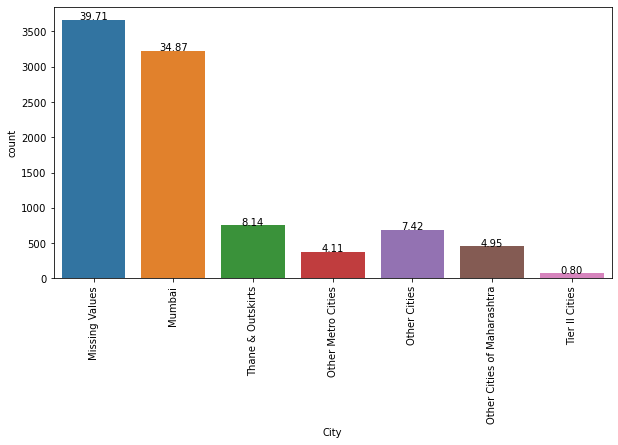

In [27]:
createCountPlot('City', (10,5))

###### Here we will impute the Missing Values with mode , ie, `Mumbai` in this case.

In [28]:
leadscore['City'].fillna('Mumbai', inplace=True)

createCountPlot('City', (10,5))

###### So we can see from the above plot that most of the leads are coming from Mumbai city, how ever the conversion rate is considerably low.

###### Treating Specialization 

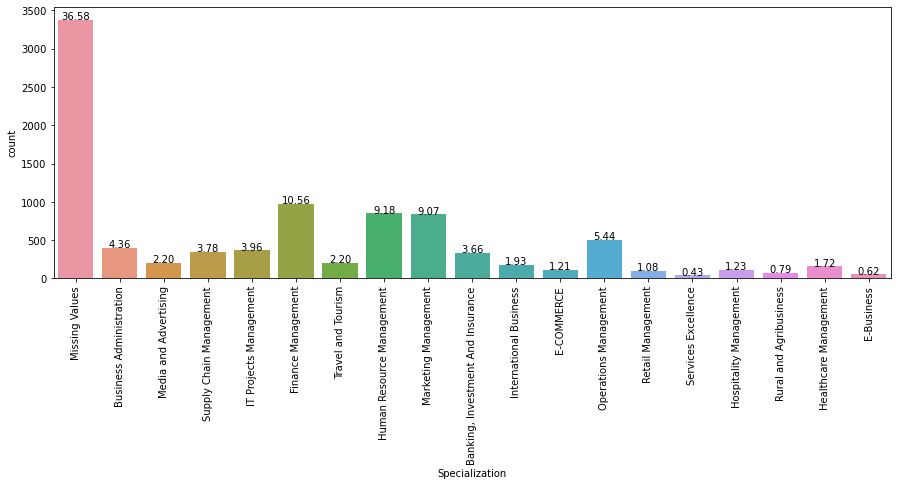

In [30]:
createCountPlot('Specialization', (15,5))

###### Here we observe that, the specializations realted to `Finance, HR and  Marketing Management` have most  of the leads and reamaining  catergories share a comparably less percentage. 
###### So we will take the following steps for the imputations.

- impute the `Missing Values` with `Finance, HR and  Marketing Management`, each of them equally.
- `Business Administration (4.36%)` and `Operations Management (5.44%)` share a considerable share. So we will keep them as it is.
- Combine remaining Management specialization in to a sigle category,`Other Managements`
- The specializations with less than 4% share, into a single category as `Other Specializations`

###### This will  help us in reducing the complexity of the model later, by keeping the count of dummy variables low.

In [31]:
leadscore['Specialization'].value_counts(normalize=True, dropna=False).head()

NaN                          0.365801
Finance Management           0.105628
Human Resource Management    0.091775
Marketing Management         0.090693
Operations Management        0.054437
Name: Specialization, dtype: float64

In [32]:
# impute the Missing Values with Finance, HR and  Marketing Management, each of them equally.
leadscore['Specialization'].iloc[:1000].fillna('Human Resource Management', inplace=True)
leadscore['Specialization'].iloc[1001:2000].fillna('Marketing Management', inplace=True)
leadscore['Specialization'].iloc[2000:].fillna('Finance Management', inplace=True)

In [33]:
leadscore['Specialization'].unique()

array(['Human Resource Management', 'Business Administration',
       'Media and Advertising', 'Supply Chain Management',
       'IT Projects Management', 'Finance Management',
       'Travel and Tourism', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [34]:
leadscore.Specialization.replace(to_replace=['Supply Chain Management',
       'IT Projects Management', 
       'Marketing Management',
       'Retail Management',
       'Hospitality Management',
       'Healthcare Management'], value='Other Management', inplace=True)

In [35]:
leadscore.Specialization.replace(to_replace=[
       'Media and Advertising',
       'Travel and Tourism', 
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE',
       'Services Excellence',
       'Rural and Agribusiness',
       'E-Business'], value='Others', inplace=True)

In [36]:
leadscore['Specialization'].value_counts(normalize=True, dropna=False)

Finance Management           0.382251
Other Management             0.249675
Human Resource Management    0.139719
Others                       0.130303
Operations Management        0.054437
Business Administration      0.043615
Name: Specialization, dtype: float64

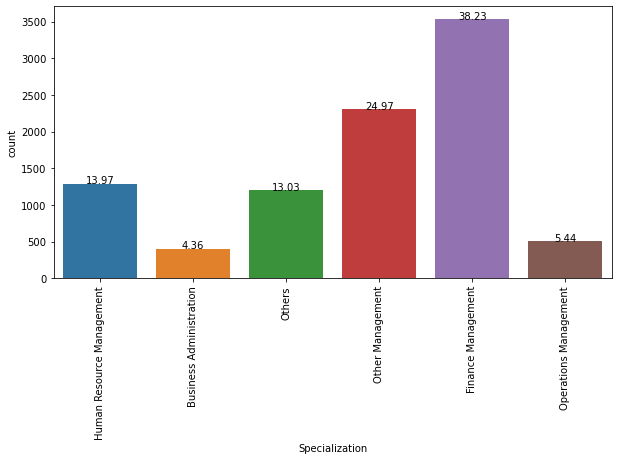

In [37]:
createCountPlot('Specialization', (10,5))

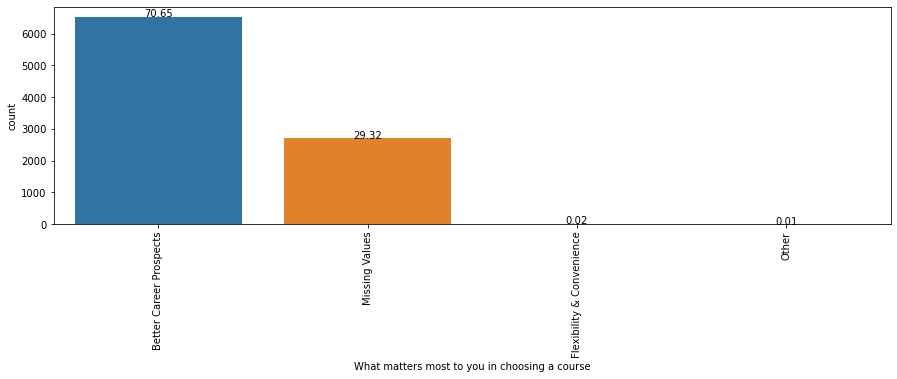

In [38]:
createCountPlot('What matters most to you in choosing a course', (15,4))

###### For the above feature also the data seems to be skewed, so we assume that almost all the leads wan to join the academy for Better career prospects. So we wil remove this feature as well, later.

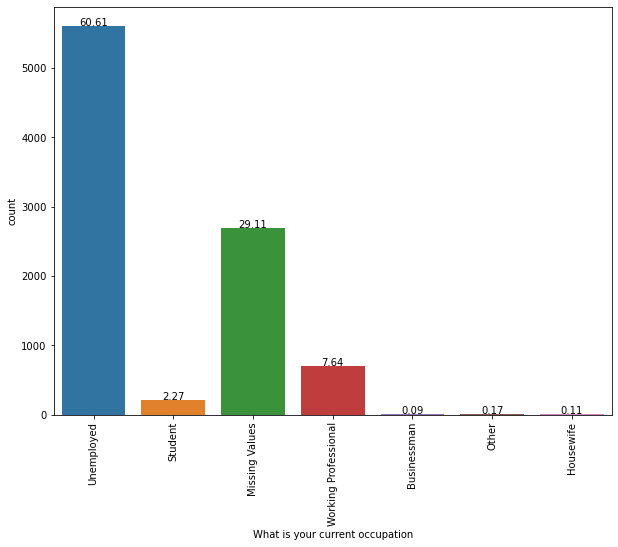

In [39]:
createCountPlot('What is your current occupation', (10,7.5))

###### For the current occupation column we will impute the missing values with mode, ie, `Unemployed`.

In [40]:
leadscore['What is your current occupation'].fillna('Not Specified', inplace=True)

leadscore['What is your current occupation'] = leadscore['What is your current occupation'].replace(['Student', 'Housewife','Businessman'], 'Other')

In [42]:
    leadscore['What is your current occupation'].value_counts()

Unemployed              5600
Not Specified           2690
Working Professional     706
Other                    244
Name: What is your current occupation, dtype: int64

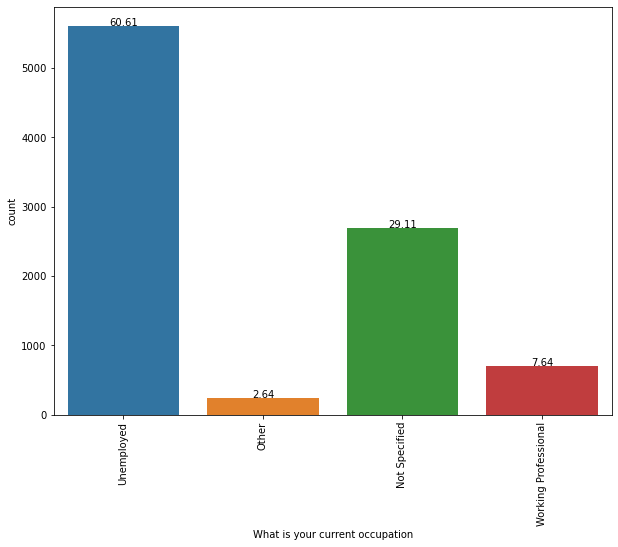

In [43]:
createCountPlot('What is your current occupation', (10,7.5))

###### We see that the lead conversion rate is high in case of Working Profesionals. Also most of the leads are `Unemployed`. Other categories in occupation are negligible.

###### Now we take a look a Country column

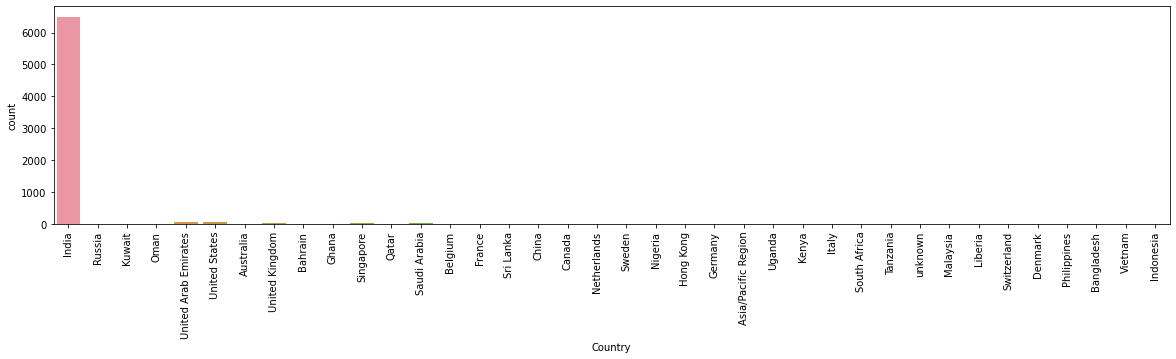

In [44]:
fig, axs = plt.subplots(figsize = (20,4))
plt.xticks(rotation = 90)
sns.countplot('Country', data=leadscore)

###### The country plot also seems to be skewed. After imputing the Missing Values with mode, `India`, it will become 97%. So we will drop this as well. 

##### Dropping `What matters most to you in choosing a course` and `Country` in this step.

In [45]:
dropTheseFeatures(['What matters most to you in choosing a course','Country'])

Dataset shape before dropping the features (9240, 15)
*****------------------------------------------*****
Removing the column What matters most to you in choosing a course
Removing the column Country
*****------------------------------------------*****
Dataset shape after dropping the features (9240, 13)


In [46]:
findNullValuesPercentage(leadscore)

,Total Null Values,Percentage of Null Values
Page Views Per Visit,137,0.01
TotalVisits,137,0.01
Last Activity,103,0.01
Lead Source,36,0.00
Last Notable Activity,0,0.00
A free copy of Mastering The Interview,0,0.00
City,0,0.00
What is your current occupation,0,0.00
Specialization,0,0.00
Total Time Spent on Website,0,0.00



###### Now we have only few NULL values left. So we will drop those rows with NULLs

In [47]:
leadscore.dropna(inplace=True)

In [48]:
findNullValuesPercentage(leadscore)

,Total Null Values,Percentage of Null Values
Last Notable Activity,0,0.0
A free copy of Mastering The Interview,0,0.0
City,0,0.0
What is your current occupation,0,0.0
Specialization,0,0.0
Last Activity,0,0.0
Page Views Per Visit,0,0.0
Total Time Spent on Website,0,0.0
TotalVisits,0,0.0
Converted,0,0.0


In [49]:
leadscore.shape

(9074, 13)

###### Finally we get the all cleaned dataset with 9074 rows and 12 features.

### We will perform some univariate and bivariate analysis 

###### Starting with `Last Notable Activity` 

In [50]:
leads_data_dict[(leads_data_dict['Variables']=='Last Activity') | (leads_data_dict['Variables']=='Last Notable Activity')]

,Variables,Description
10,Last Activity,"Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc."
36,Last Notable Activity,The last notable acitivity performed by the student.


###### From the data dictionary  we see that `Last Notable Activity` is defined very similar to `Last Activity`

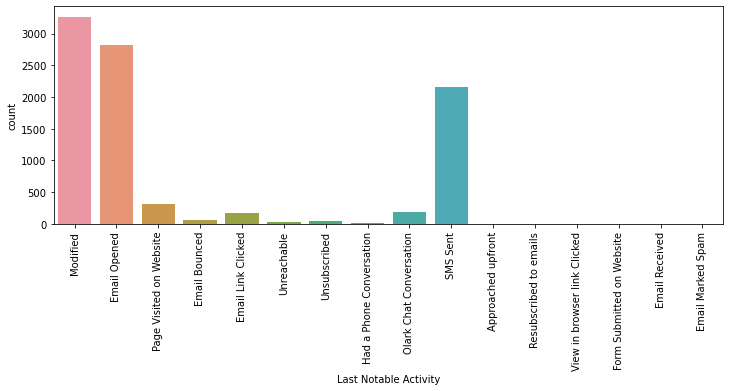

In [51]:
fig, axs = plt.subplots(figsize = (12,4))
plt.xticks(rotation = 90)
sns.countplot('Last Notable Activity', data=leadscore)

######  The `Last Notable Activity` is  last  activity performed by the student. It is not relevant for our modelling purpose. So we will drop it here.

In [52]:
dropTheseFeatures(['Last Notable Activity'])

Dataset shape before dropping the features (9074, 13)
*****------------------------------------------*****
Removing the column Last Notable Activity
*****------------------------------------------*****
Dataset shape after dropping the features (9074, 12)


###### We will perform the some analysis and cleaning operation for `Last Activity`

In [53]:
round(leadscore['Last Activity'].value_counts(normalize=True, ascending=False), 2)

Email Opened                    0.38
SMS Sent                        0.30
Olark Chat Conversation         0.11
Page Visited on Website         0.07
Converted to Lead               0.05
Email Bounced                   0.03
Email Link Clicked              0.03
Form Submitted on Website       0.01
Unreachable                     0.01
Unsubscribed                    0.01
Had a Phone Conversation        0.00
View in browser link Clicked    0.00
Approached upfront              0.00
Email Received                  0.00
Email Marked Spam               0.00
Resubscribed to emails          0.00
Visited Booth in Tradeshow      0.00
Name: Last Activity, dtype: float64

In [54]:
leadscore['Last Activity'] = leadscore['Last Activity'].replace([           
                                                                'Form Submitted on Website',       
                                                                'Unreachable',                     
                                                                'Unsubscribed',                    
                                                                'Had a Phone Conversation',        
                                                                'View in browser link Clicked',    
                                                                'Approached upfront',              
                                                                'Email Received',                  
                                                                'Email Marked Spam',               
                                                                'Resubscribed to emails',          
                                                                'Visited Booth in Tradeshow'], 'Miscellaneous')

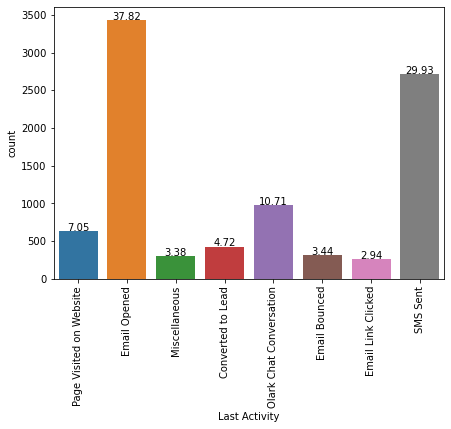

In [55]:
createCountPlot('Last Activity', (7, 5))


###### A free copy of Mastering The Interview

In [56]:
leadscore['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

###### For this column we will just replace Yes:1, No:0

In [57]:
leadscore['A free copy of Mastering The Interview'].replace({'Yes':1, 'No':0}, inplace=True)

In [58]:
leadscore['A free copy of Mastering The Interview'].value_counts()

0    6186
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

###### Analyzing City columns

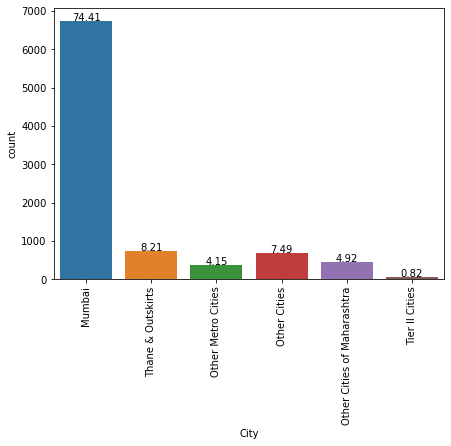

In [59]:
createCountPlot('City', (7, 5))

In [60]:
leadscore['City'] = leadscore['City'].replace(['Thane & Outskirts', 'Other Metro Cities', 'Other Cities',
       'Other Cities of Maharashtra', 'Tier II Cities'], 'Not Mumbai Cities')

In [61]:
leadscore['City'].value_counts()

Mumbai               6752
Not Mumbai Cities    2322
Name: City, dtype: int64

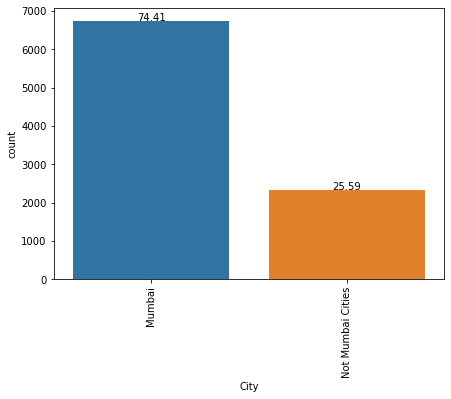

In [62]:
createCountPlot('City', (7, 5))

In [63]:
leadscore['What is your current occupation'].value_counts()

Unemployed              5476
Not Specified           2683
Working Professional     677
Other                    238
Name: What is your current occupation, dtype: int64

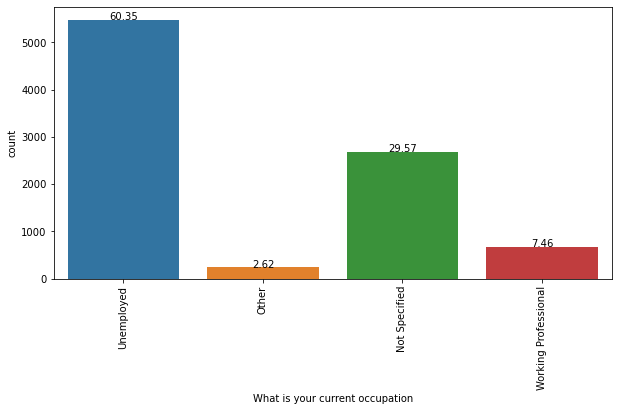

In [64]:
createCountPlot('What is your current occupation', (10, 5))

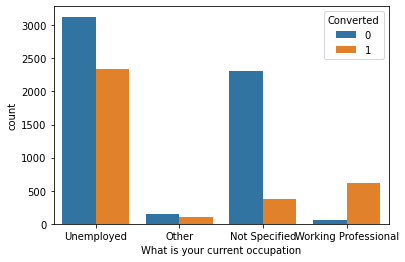

In [65]:
sns.countplot(leadscore['What is your current occupation'], hue=leadscore.Converted)

plt.show()

###### `Working Professional` are can be a important feature to since their conversion rate is very high.
###### However the datasets contains mostly Unemployed leads

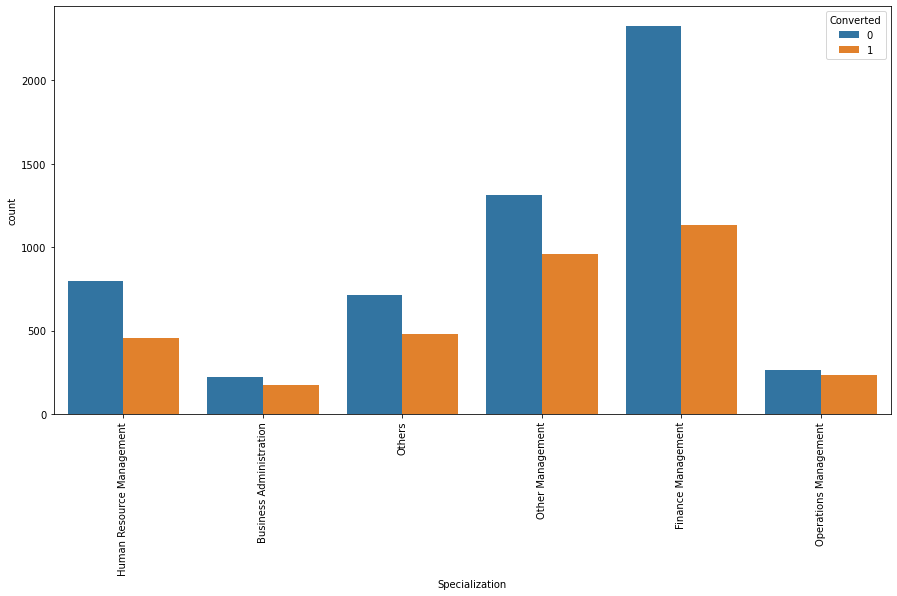

In [66]:
fig, axs = plt.subplots(figsize = (15, 7.5))
sns.countplot(leadscore['Specialization'], hue=leadscore.Converted)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

###### We see that  leads who have done specialization in  `Management` specially in `FInance Management` have higher number of leads as well as leads converted. This variable is highly significant and will help in model building.

In [67]:
findNullValuesPercentage(leadscore)

,Total Null Values,Percentage of Null Values
A free copy of Mastering The Interview,0,0.0
City,0,0.0
What is your current occupation,0,0.0
Specialization,0,0.0
Last Activity,0,0.0
Page Views Per Visit,0,0.0
Total Time Spent on Website,0,0.0
TotalVisits,0,0.0
Converted,0,0.0
Lead Source,0,0.0


###### analyzing the trend of `Page Views Per Visit' using boxplot 

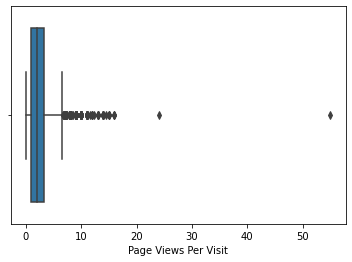

In [68]:
sns.boxplot('Page Views Per Visit', data=leadscore)

###### We see that there are many outliers in the higher side of the data. 
###### We will remove theese the outliers by capping using soft range capping.

In [69]:
q1 = leadscore['Page Views Per Visit'].quantile(0.05) #---- lower range taken
q4 = leadscore['Page Views Per Visit'].quantile(0.95) #----- higher range taken

leadscore['Page Views Per Visit'][leadscore['Page Views Per Visit']<=q1] = q1 #----- capping of lower range 
leadscore['Page Views Per Visit'][leadscore['Page Views Per Visit']>=q4] = q4 #----- capping of higher range

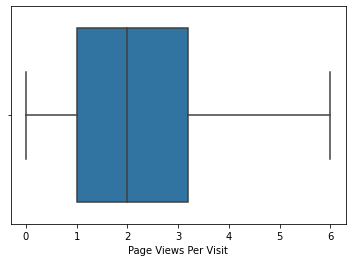

In [70]:
sns.boxplot('Page Views Per Visit', data=leadscore)

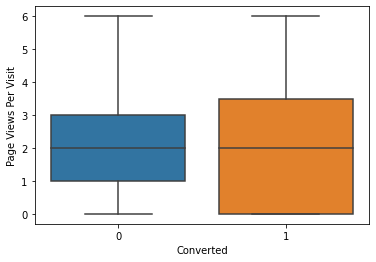

In [71]:
sns.boxplot(x=leadscore.Converted,y=leadscore['Page Views Per Visit'])
plt.show()

###### From above plots we see that Median for converted and not converted leads are almost same. So We cannot say anything about the lead conversion based on Page Views 

###### Analyzing Total Time Spent on Website

In [72]:
leadscore['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

    ###### The above summary shows that the total time is given in minutes. We will convert these to Hours first

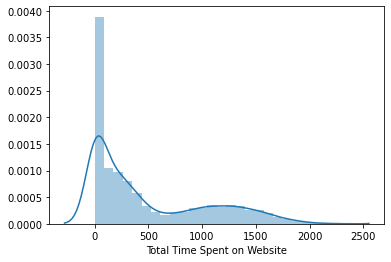

In [73]:
sns.distplot(leadscore['Total Time Spent on Website'])

In [74]:
leadscore['Total Time Spent on Website'] = leadscore['Total Time Spent on Website'].apply(lambda x: round((x/60), 2))

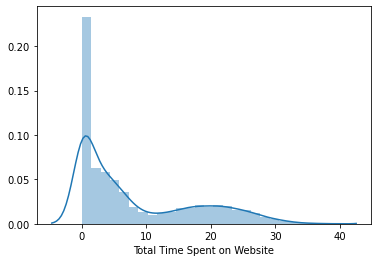

In [75]:
sns.distplot(leadscore['Total Time Spent on Website'], )

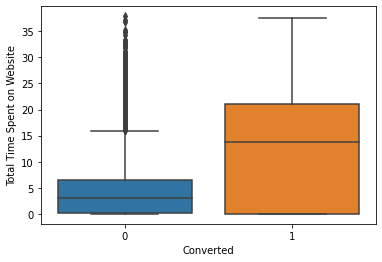

In [76]:
sns.boxplot(x=leadscore.Converted, y=leadscore['Total Time Spent on Website'])
plt.show()

###### The above plot tells that  Leads spending more time on the website are more likely to be converted.
###### Therefore, we can suggest to the company to make the website more reliable and attractable for the leads, so that they spend more time on the website.

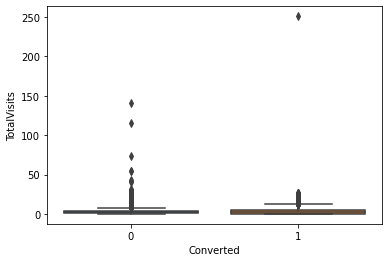

In [77]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leadscore)
plt.show()

###### Treating the outliers in `TotalVisits`

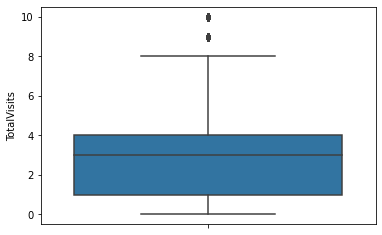

In [78]:
Q3 = leadscore.TotalVisits.quantile(0.95)
leadscore = leadscore[(leadscore.TotalVisits <= Q3)]
Q1 = leadscore.TotalVisits.quantile(0.05)
leadscore = leadscore[(leadscore.TotalVisits >= Q1)]
sns.boxplot(y=leadscore['TotalVisits'])
plt.show()

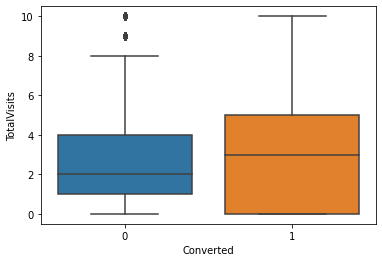

In [79]:
sns.boxplot(y='TotalVisits', x='Converted', data=leadscore)

###### From above plots we see that Median for converted and not converted leads are almost same. So We cannot say anything about the lead conversion based on TotalVisits

###### Analyzing Lead Source and Lead Origin

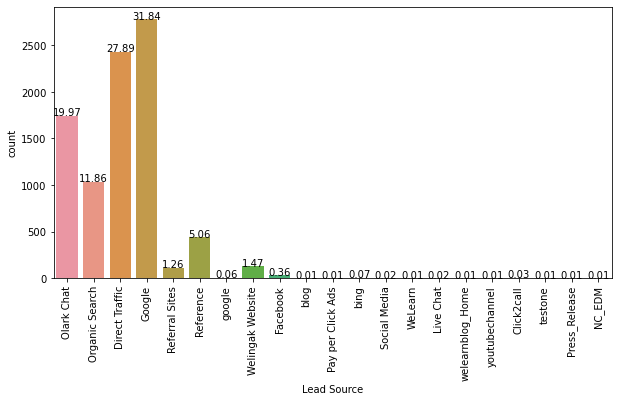

In [80]:
createCountPlot('Lead Source', (10,5))

###### Replace the ctaegories with lower count with `Others` category to reduce the dummy variable. This is avoid the model complexity

In [81]:
leadscore['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'Click2call', 'testone', 'Press_Release', 'NC_EDM'], dtype=object)

In [82]:
leadscore['Lead Source'] = leadscore['Lead Source'].replace(['blog', 'Pay per Click Ads', 
                                                'bing', 'Social Media','WeLearn', 'Click2call', 'Live Chat', 
                                                'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'], 'Other')



In [83]:
leadscore['Lead Source'] = leadscore['Lead Source'].replace('google', 'Google')

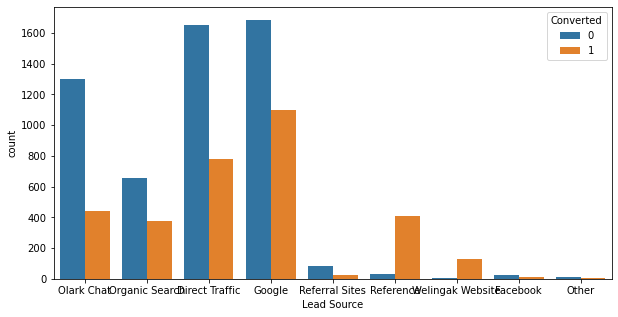

In [84]:
fig, axs = plt.subplots(figsize = (10, 5))
sns.countplot('Lead Source', hue='Converted', data=leadscore)

###### From above plot we see that most of the leads are coming from sources like, `Olark Chat`, `Organic Search` , `Direct Traffic` and `Google` However their conversion rate is low. But the conversion rate for `Reference` and `Welingak WebSite` is quite high. So we should definitely consider these Lead Source in our model.

In [85]:
leadscore['Lead Origin'].describe()

count                        8721
unique                          4
top       Landing Page Submission
freq                         4628
Name: Lead Origin, dtype: object

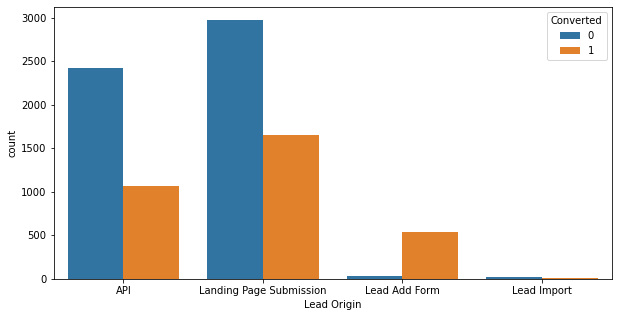

In [86]:
fig, axs = plt.subplots(figsize = (10, 5))
sns.countplot('Lead Origin', hue='Converted', data=leadscore)

###### From the `Lead Origin` plot, we can see that most of the leads were identified from Landing Page submission and then by APIs. 
###### However the conversion rate of `Lead Add Form` is comparitably good. 
##### So we will drop only the `Lead Import` which is insignificant in this case, and it will unnecessarily create extra dummy variable.

In [87]:
#Drop all the rows with `Lead Import` as Lead Origin
leadscore.drop(leadscore[leadscore['Lead Origin'] == 'Lead Import'].index, inplace=True)

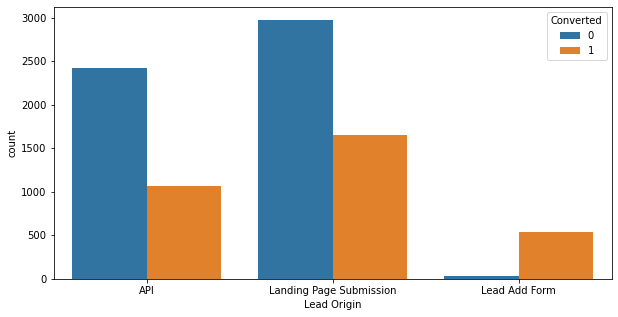

In [88]:
fig, axs = plt.subplots(figsize = (10, 5))
sns.countplot('Lead Origin', hue='Converted', data=leadscore)

###### Lead Add form have higest Conversion rate

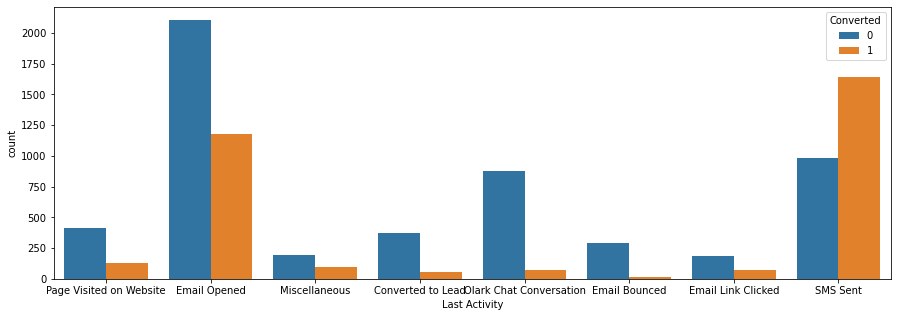

In [89]:
fig, axs = plt.subplots(figsize = (15, 5))
sns.countplot('Last Activity', hue='Converted', data=leadscore)

###### SMS sent has highest conversion rate.

In [90]:


leadscore.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [91]:
leadscore_corr = leadscore[['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview']]

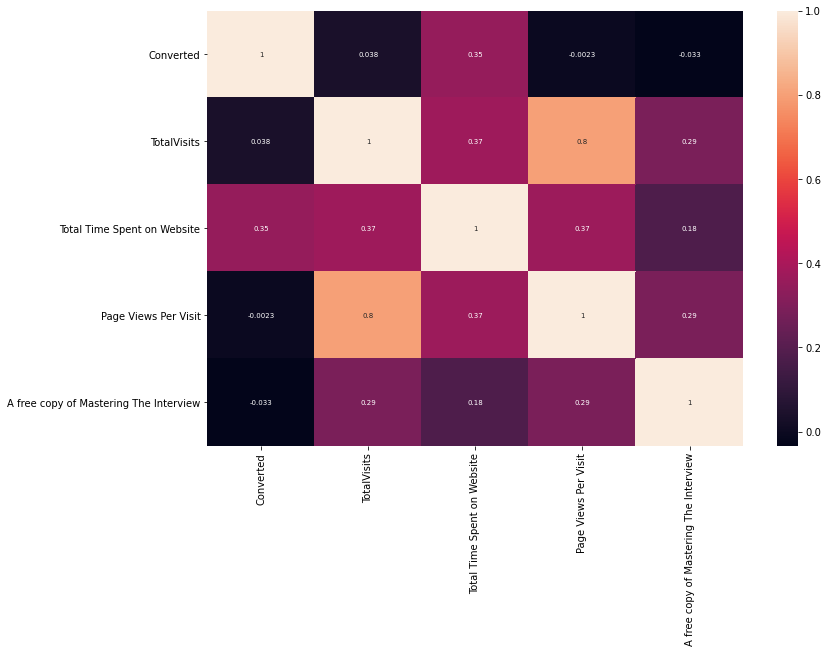

In [92]:
generateHeatmaps(leadscore_corr, (12,8))

###### Based on the above heatmap we can say that `Page Views Per Visit` and `Total Visit` are correlated, Othere than these, there aren't any highly correlated features. 


###### Finally we have completed our analysis using visualization . Now we start the Data preparation with the cleansed dataset.

In [93]:
leadscore.shape

(8691, 12)

In [94]:
leadscore.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0.00,0.0,Page Visited on Website,Human Resource Management,Unemployed,Mumbai,0
1,660728,API,Organic Search,0,5.0,11.23,2.5,Email Opened,Human Resource Management,Unemployed,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,25.53,2.0,Email Opened,Business Administration,Other,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,1.0,5.08,1.0,Miscellaneous,Others,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,1,2.0,23.80,1.0,Converted to Lead,Human Resource Management,Unemployed,Mumbai,0


In [95]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8691 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             8691 non-null   int64  
 1   Lead Origin                             8691 non-null   object 
 2   Lead Source                             8691 non-null   object 
 3   Converted                               8691 non-null   int64  
 4   TotalVisits                             8691 non-null   float64
 5   Total Time Spent on Website             8691 non-null   float64
 6   Page Views Per Visit                    8691 non-null   float64
 7   Last Activity                           8691 non-null   object 
 8   Specialization                          8691 non-null   object 
 9   What is your current occupation         8691 non-null   object 
 10  City                                    8691 non-null   obje

###### Creating dummy variables for all categorical columns

In [96]:
categorical_feature =  leadscore.select_dtypes(include=['object']).columns
categorical_feature

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City'],
      dtype='object')

###### For the above 7 categorical columns, dummy encoding is required.

###### We will create the dummies and drop the catergory which has the least frequency in each column

In [97]:
dummy = pd.get_dummies(leadscore['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Business Administration'], 1)
leads_dummified = pd.concat([leadscore, dummy], axis = 1)

In [98]:
dummy = pd.get_dummies(leadscore['Lead Source'], prefix  = 'Lead_Source')
dummy = dummy.drop(['Lead_Source_Facebook'], 1)
leads_dummified = pd.concat([leads_dummified, dummy], axis = 1)

In [99]:
dummy = pd.get_dummies(leadscore['Last Activity'], prefix  = 'Last_Activity')
dummy = dummy.drop(['Last_Activity_Email Link Clicked'], 1)
leads_dummified = pd.concat([leads_dummified, dummy], axis = 1)

In [100]:
leadscore['Lead Origin'].value_counts()

Landing Page Submission    4628
API                        3486
Lead Add Form               577
Name: Lead Origin, dtype: int64

In [101]:
dummy = pd.get_dummies(leadscore['Lead Origin'], prefix = 'Lead_Origin', drop_first=True)
# dummy = dummy.drop(['Lead_Origin_Lead Add Form'], 1)
leads_dummified = pd.concat([leads_dummified, dummy], axis = 1)

In [102]:
dummy = pd.get_dummies(leadscore['What is your current occupation'], prefix = 'Occupation')
dummy = dummy.drop(['Occupation_Other'], 1)
leads_dummified = pd.concat([leads_dummified, dummy], axis = 1)

In [103]:
dummy = pd.get_dummies(leadscore['City'], prefix = 'City')
dummy = dummy.drop(['City_Not Mumbai Cities'], 1)
leads_dummified = pd.concat([leads_dummified, dummy], axis = 1)

In [104]:
leads_dummified.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City'], axis=1, inplace=True)

In [105]:
leads_dummified.shape

(8691, 32)

In [106]:
leads_dummified.head(5)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Operations Management,Specialization_Other Management,Specialization_Others,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Opened,Last_Activity_Miscellaneous,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Occupation_Not Specified,Occupation_Unemployed,Occupation_Working Professional,City_Mumbai
0,660737,0,0.0,0.00,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1,660728,0,5.0,11.23,2.5,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2,660727,1,2.0,25.53,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,660719,0,1.0,5.08,1.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
4,660681,1,2.0,23.80,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


###### Test and Train Split

In [107]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
lead_df_train,lead_df_test=train_test_split(leads_dummified,train_size=0.7,random_state=100)

In [108]:
X_train = lead_df_train.drop(['Converted','Lead Number'], axis=1)
y_train = lead_df_train['Converted']

In [109]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6083 entries, 8348 to 6026
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TotalVisits                               6083 non-null   float64
 1   Total Time Spent on Website               6083 non-null   float64
 2   Page Views Per Visit                      6083 non-null   float64
 3   A free copy of Mastering The Interview    6083 non-null   int64  
 4   Specialization_Finance Management         6083 non-null   uint8  
 5   Specialization_Human Resource Management  6083 non-null   uint8  
 6   Specialization_Operations Management      6083 non-null   uint8  
 7   Specialization_Other Management           6083 non-null   uint8  
 8   Specialization_Others                     6083 non-null   uint8  
 9   Lead_Source_Direct Traffic                6083 non-null   uint8  
 10  Lead_Source_Google               

###### Scaling the numerical columns

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head(5)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Operations Management,Specialization_Other Management,Specialization_Others,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Opened,Last_Activity_Miscellaneous,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Occupation_Not Specified,Occupation_Unemployed,Occupation_Working Professional,City_Mumbai
8348,0.030709,0.220453,0.452457,-0.676538,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1
194,0.844663,-0.308351,1.593786,-0.676538,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
9165,-1.190222,-0.878087,-1.259536,-0.676538,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3396,-0.376268,0.654116,-0.118207,1.478113,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2340,-0.376268,-0.717676,-0.118207,1.478113,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1


###### Now we will start with model building using the stats model and select top 15 significant features using the RFE

In [111]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [112]:
leads_reg = LogisticRegression()

In [113]:
rfe = RFE(leads_reg, 15)
rfe = rfe.fit(X_train, y_train)

###### Check the columns reatained by rfe using rfe support and ranking

In [114]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('A free copy of Mastering The Interview', False, 16),
 ('Specialization_Finance Management', False, 4),
 ('Specialization_Human Resource Management', False, 14),
 ('Specialization_Operations Management', False, 15),
 ('Specialization_Other Management', False, 12),
 ('Specialization_Others', False, 13),
 ('Lead_Source_Direct Traffic', True, 1),
 ('Lead_Source_Google', True, 1),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', True, 1),
 ('Lead_Source_Other', False, 11),
 ('Lead_Source_Reference', True, 1),
 ('Lead_Source_Referral Sites', False, 2),
 ('Lead_Source_Welingak Website', True, 1),
 ('Last_Activity_Converted to Lead', False, 8),
 ('Last_Activity_Email Bounced', True, 1),
 ('Last_Activity_Email Opened', True, 1),
 ('Last_Activity_Miscellaneous', True, 1),
 ('Last_Activity_Olark Chat Conversation', True, 1),
 ('Last_Activity_Page Visited on Website',

In [115]:
rfe_selected_features = X_train.columns[rfe.support_]
rfe_selected_features

Index(['Total Time Spent on Website', 'Lead_Source_Direct Traffic',
       'Lead_Source_Google', 'Lead_Source_Olark Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Reference',
       'Lead_Source_Welingak Website', 'Last_Activity_Email Bounced',
       'Last_Activity_Email Opened', 'Last_Activity_Miscellaneous',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent',
       'Lead_Origin_Lead Add Form', 'Occupation_Not Specified',
       'Occupation_Working Professional'],
      dtype='object')

In [116]:
X_train_sm = sm.add_constant(X_train[rfe_selected_features])
model1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6083
Model:                            GLM   Df Residuals:                     6067
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2527.0
Date:                Mon, 07 Sep 2020   Deviance:                       5054.1
Time:                        23:22:52   Pearson chi2:                 6.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.1364      0.290     -3.915      0.000      -1.705      -0.568
Total Time Spent on Website               1.0586      0.041     26.039      0.000       0.979       1.138
Lead_Source_Direct Traffic               -0.8673      0.286     -3.031      0.002      -1.428      -0.306
Lead_Source_Google                       -0.4421      0.284     -1.556      0.120      -0.999       0.115
Lead_Source_Olark Chat                    0.9041      0.291      3.108      0.002       0.334       1.474
Lead_Source_Organic Search               -0.6252      0.296     -2.113      0.035      -1.205      -0.045
Lead_Source_Reference                     1.8250      0.957      1.906      0.057      -0.051       3.702
Lead_Source_Welingak Website              3.5228      1.184      2.975      0.003       1.202       5.843
Last_Activity_Email Bounced              -1.5200      0.381     -3.991      0.000      -2.267      -0.774
Last_Activity_Email Opened                0.7360      0.118      6.211      0.000       0.504       0.968
Last_Activity_Miscellaneous               0.6881      0.213      3.227      0.001       0.270       1.106
Last_Activity_Olark Chat Conversation    -0.9283      0.198     -4.694      0.000      -1.316      -0.541
Last_Activity_SMS Sent                    1.7984      0.121     14.885      0.000       1.562       2.035
Lead_Origin_Lead Add Form                 1.1868      0.953      1.245      0.213      -0.682       3.055
Occupation_Not Specified                 -1.2401      0.088    -14.150      0.000      -1.412      -1.068
Occupation_Working Professional           2.5772      0.200     12.876      0.000       2.185       2.969
=========================================================================================================
"""

In [117]:
rfe_selected_features = rfe_selected_features.drop('Lead_Source_Organic Search', 1)
rfe_selected_features

Index(['Total Time Spent on Website', 'Lead_Source_Direct Traffic',
       'Lead_Source_Google', 'Lead_Source_Olark Chat', 'Lead_Source_Reference',
       'Lead_Source_Welingak Website', 'Last_Activity_Email Bounced',
       'Last_Activity_Email Opened', 'Last_Activity_Miscellaneous',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent',
       'Lead_Origin_Lead Add Form', 'Occupation_Not Specified',
       'Occupation_Working Professional'],
      dtype='object')

In [118]:
X_train_sm = sm.add_constant(X_train[rfe_selected_features])
model2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = model2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6083
Model:                            GLM   Df Residuals:                     6068
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2529.2
Date:                Mon, 07 Sep 2020   Deviance:                       5058.3
Time:                        23:22:53   Pearson chi2:                 6.10e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6848      0.138    -12.225      0.000      -1.955      -1.415
Total Time Spent on Website               1.0567      0.041     26.030      0.000       0.977       1.136
Lead_Source_Direct Traffic               -0.3076      0.115     -2.673      0.008      -0.533      -0.082
Lead_Source_Google                        0.1163      0.112      1.040      0.298      -0.103       0.335
Lead_Source_Olark Chat                    1.4575      0.135     10.811      0.000       1.193       1.722
Lead_Source_Reference                     1.9380      0.971      1.996      0.046       0.035       3.841
Lead_Source_Welingak Website              3.6362      1.195      3.043      0.002       1.294       5.978
Last_Activity_Email Bounced              -1.5334      0.381     -4.026      0.000      -2.280      -0.787
Last_Activity_Email Opened                0.7276      0.118      6.147      0.000       0.496       0.960
Last_Activity_Miscellaneous               0.6893      0.213      3.233      0.001       0.271       1.107
Last_Activity_Olark Chat Conversation    -0.9241      0.198     -4.674      0.000      -1.312      -0.537
Last_Activity_SMS Sent                    1.7795      0.120     14.790      0.000       1.544       2.015
Lead_Origin_Lead Add Form                 1.6308      0.948      1.720      0.085      -0.227       3.489
Occupation_Not Specified                 -1.2341      0.088    -14.093      0.000      -1.406      -1.062
Occupation_Working Professional           2.5725      0.200     12.874      0.000       2.181       2.964
=========================================================================================================
"""

In [119]:
rfe_selected_features = rfe_selected_features.drop('Lead_Source_Reference', 1)
rfe_selected_features

Index(['Total Time Spent on Website', 'Lead_Source_Direct Traffic',
       'Lead_Source_Google', 'Lead_Source_Olark Chat',
       'Lead_Source_Welingak Website', 'Last_Activity_Email Bounced',
       'Last_Activity_Email Opened', 'Last_Activity_Miscellaneous',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent',
       'Lead_Origin_Lead Add Form', 'Occupation_Not Specified',
       'Occupation_Working Professional'],
      dtype='object')

In [120]:
X_train_sm = sm.add_constant(X_train[rfe_selected_features])
model3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = model3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6083
Model:                            GLM   Df Residuals:                     6069
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2530.8
Date:                Mon, 07 Sep 2020   Deviance:                       5061.6
Time:                        23:22:53   Pearson chi2:                 6.08e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6840      0.138    -12.215      0.000      -1.954      -1.414
Total Time Spent on Website               1.0558      0.041     26.004      0.000       0.976       1.135
Lead_Source_Direct Traffic               -0.3094      0.115     -2.687      0.007      -0.535      -0.084
Lead_Source_Google                        0.1145      0.112      1.023      0.306      -0.105       0.334
Lead_Source_Olark Chat                    1.4530      0.135     10.769      0.000       1.189       1.717
Lead_Source_Welingak Website              1.7719      0.764      2.320      0.020       0.275       3.268
Last_Activity_Email Bounced              -1.5319      0.381     -4.022      0.000      -2.278      -0.785
Last_Activity_Email Opened                0.7285      0.118      6.152      0.000       0.496       0.961
Last_Activity_Miscellaneous               0.6926      0.213      3.251      0.001       0.275       1.110
Last_Activity_Olark Chat Conversation    -0.9212      0.198     -4.659      0.000      -1.309      -0.534
Last_Activity_SMS Sent                    1.7812      0.120     14.801      0.000       1.545       2.017
Lead_Origin_Lead Add Form                 3.4922      0.242     14.416      0.000       3.017       3.967
Occupation_Not Specified                 -1.2337      0.088    -14.090      0.000      -1.405      -1.062
Occupation_Working Professional           2.5749      0.200     12.893      0.000       2.183       2.966
=========================================================================================================
"""

In [121]:
rfe_selected_features = rfe_selected_features.drop('Last_Activity_Miscellaneous', 1)
rfe_selected_features

Index(['Total Time Spent on Website', 'Lead_Source_Direct Traffic',
       'Lead_Source_Google', 'Lead_Source_Olark Chat',
       'Lead_Source_Welingak Website', 'Last_Activity_Email Bounced',
       'Last_Activity_Email Opened', 'Last_Activity_Olark Chat Conversation',
       'Last_Activity_SMS Sent', 'Lead_Origin_Lead Add Form',
       'Occupation_Not Specified', 'Occupation_Working Professional'],
      dtype='object')

In [122]:
X_train_sm = sm.add_constant(X_train[rfe_selected_features])
model4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = model4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6083
Model:                            GLM   Df Residuals:                     6070
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2535.9
Date:                Mon, 07 Sep 2020   Deviance:                       5071.9
Time:                        23:22:53   Pearson chi2:                 6.09e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5288      0.127    -12.040      0.000      -1.778      -1.280
Total Time Spent on Website               1.0541      0.040     26.030      0.000       0.975       1.133
Lead_Source_Direct Traffic               -0.3153      0.115     -2.743      0.006      -0.541      -0.090
Lead_Source_Google                        0.1229      0.112      1.100      0.271      -0.096       0.342
Lead_Source_Olark Chat                    1.4535      0.135     10.791      0.000       1.190       1.718
Lead_Source_Welingak Website              1.7435      0.764      2.283      0.022       0.247       3.240
Last_Activity_Email Bounced              -1.6857      0.377     -4.468      0.000      -2.425      -0.946
Last_Activity_Email Opened                0.5730      0.106      5.412      0.000       0.365       0.780
Last_Activity_Olark Chat Conversation    -1.0768      0.190     -5.654      0.000      -1.450      -0.704
Last_Activity_SMS Sent                    1.6263      0.108     15.057      0.000       1.415       1.838
Lead_Origin_Lead Add Form                 3.5030      0.242     14.462      0.000       3.028       3.978
Occupation_Not Specified                 -1.2396      0.087    -14.171      0.000      -1.411      -1.068
Occupation_Working Professional           2.5756      0.200     12.907      0.000       2.184       2.967
=========================================================================================================
"""

###### SInce all the p-values are less as ecpexted, so we can check the VIF for multicolinearity among the variables. 

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_selected_features].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_selected_features].values, i) for i in range(X_train[rfe_selected_features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last_Activity_Email Opened,2.32
3,Lead_Source_Olark Chat,2.28
8,Last_Activity_SMS Sent,2.10
2,Lead_Source_Google,2.05
1,Lead_Source_Direct Traffic,1.90
7,Last_Activity_Olark Chat Conversation,1.71
9,Lead_Origin_Lead Add Form,1.70
10,Occupation_Not Specified,1.54
0,Total Time Spent on Website,1.31
4,Lead_Source_Welingak Website,1.30


###### VIF for all the variables are also less than 3. SO we can go ahead with this model with these features. 

###### Now we can proceed to derive the predictions, probabilities and  LeadScore on the trainin data.

In [124]:
final_selected_features = rfe_selected_features

In [125]:
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

8348    0.878148
194     0.017170
9165    0.351108
3396    0.954663
2340    0.116326
9045    0.073180
3011    0.211578
4732    0.935526
5641    0.988089
3001    0.886358
dtype: float64

In [126]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.87814844, 0.0171696 , 0.3511079 , 0.95466264, 0.116326  ,
       0.07317992, 0.21157809, 0.93552576, 0.98808923, 0.8863579 ])

In [127]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = leadscore['Lead Number']
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Lead Number
0,1,0.878148,660737.0
1,0,0.017170,660728.0
2,1,0.351108,660727.0
3,1,0.954663,660719.0
4,0,0.116326,660681.0


###### Find the lead score and add a `Lead Score` column to the above table

In [128]:
y_train_pred_final['Lead_Score'] = round((y_train_pred_final['Lead_Score_Prob'] * 100),0)


In [129]:
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Lead Number,Lead_Score
0,1,0.878148,660737.0,88.0
1,0,0.017170,660728.0,2.0
2,1,0.351108,660727.0,35.0
3,1,0.954663,660719.0,95.0
4,0,0.116326,660681.0,12.0


###### We will add a new column `Predicted Hot Lead` assuming  threshold value as 0.5

In [130]:
y_train_pred_final['Predicted_Hot_Lead'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Lead Number,Lead_Score,Predicted_Hot_Lead
0,1,0.878148,660737.0,88.0,1
1,0,0.017170,660728.0,2.0,0
2,1,0.351108,660727.0,35.0,0
3,1,0.954663,660719.0,95.0,1
4,0,0.116326,660681.0,12.0,0


###### Calaculate the Lead score based on the `Lead_Score_Prob` and generate the confusion matrix.

In [131]:
y_train_pred_final['Lead_Score'] = round((y_train_pred_final['Lead_Score_Prob'] * 100),0)
y_train_pred_final['Lead_Score'] = y_train_pred_final['Lead_Score'].astype(int)
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Lead Number,Lead_Score,Predicted_Hot_Lead
0,1,0.878148,660737.0,88,1
1,0,0.017170,660728.0,2,0
2,1,0.351108,660727.0,35,0
3,1,0.954663,660719.0,95,1
4,0,0.116326,660681.0,12,0


In [132]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_Hot_Lead )
print(confusion_matrix)

[[3336  427]
 [ 746 1574]]


###### With the help of the confusion matrix, we will calculate the below metrics, which will be used late for model evaluation later.


###### 1. Accuracy

In [133]:
print('Accuracy for the Model 4 is {}%'.format(round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Hot_Lead),2)*100 ))

Accuracy for the Model 4 is 81.0%


In [134]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [135]:
sensitivity = round((TP / float(TP+FN)),2)
specificity = round((TN / float(TN+FP)),2)

print('Sensitivity is {}% and Specificity is {}%'.format(sensitivity*100, specificity*100))

Sensitivity is 68.0% and Specificity is 89.0%


######  This value of Sensitivity does not fullfill our objective ,as the CEO of the company has given a ballpark of the target lead conversion rate to be around 80%. This implies that the threshold value we chose ealier`[50%]` is not correct. Thus we need a better threshold.

In [136]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Predicted_Hot_Lead, drop_intermediate = False )


In [137]:
print(len(fpr), len(tpr), len(thresholds))
print(len(y_train_pred_final))

3 3 3
6083


In [138]:
# print('False Positive Rate is {},  True Positive Rate is {} and Threshold values is {}'. format(fpr, tpr, thresholds))

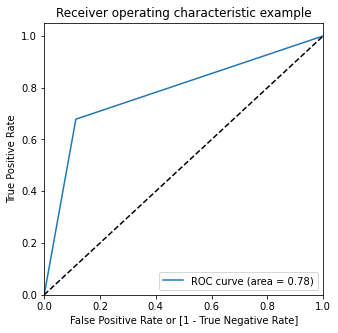

In [139]:
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Predicted_Hot_Lead)

###### The ROC AUC value, we got, is 0.80. This  indicates the we have  a good  model and is capable of distinguising the classes.

###### Now we will find the prediction on the train data using this model and also calculate the cut-off threshold values 

In [140]:
y_train_pred_final

,Converted,Lead_Score_Prob,Lead Number,Lead_Score,Predicted_Hot_Lead
0,1,0.878148,660737.0,88,1
1,0,0.017170,660728.0,2,0
2,1,0.351108,660727.0,35,0
3,1,0.954663,660719.0,95,1
4,0,0.116326,660681.0,12,0
...,...,...,...,...,...
6078,0,0.078756,603189.0,8,0
6079,0,0.149861,603182.0,15,0
6080,0,0.589479,603178.0,59,1
6081,0,0.189713,603167.0,19,0


In [141]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Lead Number,Lead_Score,Predicted_Hot_Lead,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.878148,660737.0,88,1,1,1,1,1,1,1,1,1,1,0
1,0,0.017170,660728.0,2,0,1,0,0,0,0,0,0,0,0,0
2,1,0.351108,660727.0,35,0,1,1,1,1,0,0,0,0,0,0
3,1,0.954663,660719.0,95,1,1,1,1,1,1,1,1,1,1,1
4,0,0.116326,660681.0,12,0,1,1,0,0,0,0,0,0,0,0


In [142]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificty', 'Precision'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci = cm1[1,1]/(cm1[1,1]+cm1[0,1])   #TP/TP+FP
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, preci]   
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificty  Precision
0.0          0.0  0.381391     1.000000    0.000000   0.381391
0.1          0.1  0.601019     0.978879    0.368057   0.488492
0.2          0.2  0.753740     0.913793    0.655062   0.620246
0.3          0.3  0.791386     0.864224    0.746479   0.677594
0.4          0.4  0.807989     0.751293    0.842944   0.746787
0.5          0.5  0.807168     0.678448    0.886527   0.786607
0.6          0.6  0.800263     0.615517    0.914164   0.815534
0.7          0.7  0.771166     0.488362    0.945522   0.846786
0.8          0.8  0.749137     0.394828    0.967579   0.882466
0.9          0.9  0.707710     0.253448    0.987776   0.927445


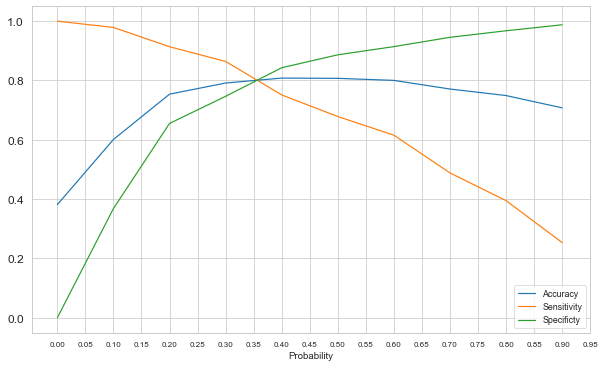

In [143]:
sns.set_style('whitegrid')
sns.set_context('paper')

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificty'], figsize=(10,6))
plt.xticks(np.arange(0,1,step=.05), size=8)
plt.yticks(size=12)
plt.show()

###### As you can see, at about a threshold of 0.36, the curves of accuracy, sensitivity and specificity intersect, and they all take a value of around 80%. With this threshold we will predict the Hot Lead again.

In [144]:
cut_off = 0.36

In [145]:
y_train_pred_final['Predicted_Hot_Lead'] = y_train_pred_final.Lead_Score_Prob.map( lambda x: 1 if x > cut_off else 0)
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Lead Number,Lead_Score,Predicted_Hot_Lead,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.878148,660737.0,88,1,1,1,1,1,1,1,1,1,1,0
1,0,0.017170,660728.0,2,0,1,0,0,0,0,0,0,0,0,0
2,1,0.351108,660727.0,35,0,1,1,1,1,0,0,0,0,0,0
3,1,0.954663,660719.0,95,1,1,1,1,1,1,1,1,1,1,1
4,0,0.116326,660681.0,12,0,1,1,0,0,0,0,0,0,0,0


In [146]:
getRegressionMetrics(y_train_pred_final.Converted,y_train_pred_final.Predicted_Hot_Lead)

[[2968  795]
 [ 432 1888]]
sensitivity: 0.81
specificity: 0.79
recall: 0.81
precision: 0.7
accuracy: 0.8
F1-score: 0.8


###### The above confusion matrix shows better results than the previously calculated one, using 0.5 as cutoff.
###### Our  business requirement of getting the sensitvity value above 80% is also achieved in this model. Also the accuracy and F1 score is pretty good.

In [147]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob)

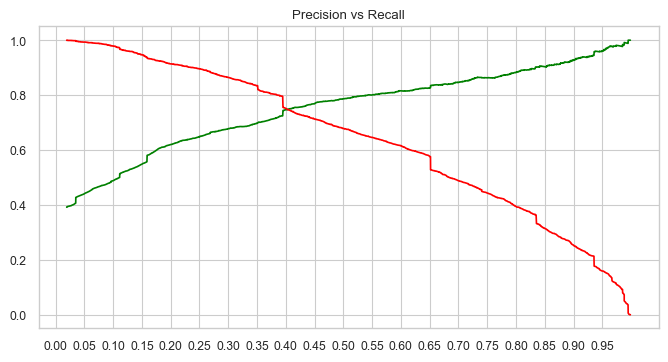

In [148]:

plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.title('Precision vs Recall')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

##### The precision vs recall tradeoff value from the above graph is at 0.41

#### From the precision-recall graph above, we get the optimum threshold value as close to .41. However our business requirement here is to have Lead Conversion Rate around 80%.  

#### This is already achieved with our earlier threshold  value of 0.36. So we will stick to this value.

###### Now making predcitions on test data

In [149]:
lead_df_test.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Operations Management,Specialization_Other Management,Specialization_Others,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Opened,Last_Activity_Miscellaneous,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Occupation_Not Specified,Occupation_Unemployed,Occupation_Working Professional,City_Mumbai
5331,608916,0,3.0,26.80,3.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1
3673,624973,0,3.0,6.05,3.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
8743,583104,1,0.0,0.00,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4233,619272,1,0.0,0.00,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4717,614573,1,3.0,26.50,3.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0


In [150]:
lead_df_test[num_cols] = scaler.transform(lead_df_test[num_cols])

###### The below features were selected for the model in the train step

In [151]:
rfe_selected_features

Index(['Total Time Spent on Website', 'Lead_Source_Direct Traffic',
       'Lead_Source_Google', 'Lead_Source_Olark Chat',
       'Lead_Source_Welingak Website', 'Last_Activity_Email Bounced',
       'Last_Activity_Email Opened', 'Last_Activity_Olark Chat Conversation',
       'Last_Activity_SMS Sent', 'Lead_Origin_Lead Add Form',
       'Occupation_Not Specified', 'Occupation_Working Professional'],
      dtype='object')

In [152]:
X_test = lead_df_test[rfe_selected_features]
y_test = lead_df_test[['Lead Number', 'Converted']]

In [153]:
print(X_test.shape)
print(y_test.shape)

(2608, 12)
(2608, 2)


In [154]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

5331    0.292342
3673    0.183731
8743    0.651441
4233    0.960871
4717    0.915676
1518    0.896098
6479    0.351478
7696    0.928440
8902    0.854848
8491    0.392098
dtype: float64

In [155]:
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Lead_Score_Prob'})
y_pred_final.head()

,Lead Number,Converted,Lead_Score_Prob
0,608916,0,0.292342
1,624973,0,0.183731
2,583104,1,0.651441
3,619272,1,0.960871
4,614573,1,0.915676


In [156]:
y_pred_final['Predicted_Hot_Lead'] = y_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > cut_off else 0)
y_pred_final.head()

,Lead Number,Converted,Lead_Score_Prob,Predicted_Hot_Lead
0,608916,0,0.292342,0
1,624973,0,0.183731,0
2,583104,1,0.651441,1
3,619272,1,0.960871,1
4,614573,1,0.915676,1


###### Find metrics of the test data resutls

In [157]:
getRegressionMetrics(y_pred_final.Converted,y_pred_final.Predicted_Hot_Lead)

[[1314  353]
 [ 156  785]]
sensitivity: 0.83
specificity: 0.79
recall: 0.83
precision: 0.69
accuracy: 0.8
F1-score: 0.81


###### So we getting almost similar results for test data as well, with 1% of deviation

###### Now we will add the Lead Score to each leads

In [158]:
y_pred_final['Lead_Score'] = round((y_pred_final['Lead_Score_Prob'] * 100),0)
y_pred_final['Lead_Score'] = y_pred_final['Lead_Score'].astype(int)

In [159]:
y_pred_final.head()

,Lead Number,Converted,Lead_Score_Prob,Predicted_Hot_Lead,Lead_Score
0,608916,0,0.292342,0,29
1,624973,0,0.183731,0,18
2,583104,1,0.651441,1,65
3,619272,1,0.960871,1,96
4,614573,1,0.915676,1,92


###### FInally we get the final result table of the test data, which contains the Leads Score for each leads, based on which we can determine whether a lead is HotLead or Cold Lead.

###### Generate leadscore for the whole dataset, which was created after the EDA, before train_test_split. 

In [160]:
leads_dummified.shape

(8691, 32)

In [161]:
leads_dummified.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Operations Management,Specialization_Other Management,Specialization_Others,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Opened,Last_Activity_Miscellaneous,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Occupation_Not Specified,Occupation_Unemployed,Occupation_Working Professional,City_Mumbai
0,660737,0,0.0,0.00,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1,660728,0,5.0,11.23,2.5,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2,660727,1,2.0,25.53,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,660719,0,1.0,5.08,1.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
4,660681,1,2.0,23.80,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


###### Scaling the cleaned dataset again 

In [162]:
leads_dummified[num_cols] = scaler.transform(leads_dummified[num_cols])
leads_dummified.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Operations Management,Specialization_Other Management,Specialization_Others,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Opened,Last_Activity_Miscellaneous,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Occupation_Not Specified,Occupation_Unemployed,Occupation_Working Professional,City_Mumbai
0,660737,0,-1.190222,-0.878087,-1.259536,-0.676538,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1,660728,0,0.844663,0.364270,0.167125,-0.676538,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2,660727,1,-0.376268,1.946255,-0.118207,1.478113,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,660719,0,-0.783245,-0.316095,-0.688871,-0.676538,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
4,660681,1,-0.376268,1.754868,-0.688871,-0.676538,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [163]:
cleaned_lead_sm = sm.add_constant(leads_dummified[rfe_selected_features])
cleaned_predicted = result.predict(cleaned_lead_sm)
cleaned_predicted

0       0.268770
1       0.360802
2       0.685759
3       0.101804
4       0.609184
          ...   
9235    0.693416
9236    0.336144
9237    0.319445
9238    0.273965
9239    0.792937
Length: 8691, dtype: float64

In [164]:
final_lead_score_df = leadscore.copy()
final_lead_score_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0.00,0.0,Page Visited on Website,Human Resource Management,Unemployed,Mumbai,0
1,660728,API,Organic Search,0,5.0,11.23,2.5,Email Opened,Human Resource Management,Unemployed,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,25.53,2.0,Email Opened,Business Administration,Other,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,1.0,5.08,1.0,Miscellaneous,Others,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,1,2.0,23.80,1.0,Converted to Lead,Human Resource Management,Unemployed,Mumbai,0


In [165]:
final_lead_score_df['Lead Score']=round(cleaned_predicted*100,2)
final_lead_score_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Lead Score
0,660737,API,Olark Chat,0,0.0,0.00,0.0,Page Visited on Website,Human Resource Management,Unemployed,Mumbai,0,26.88
1,660728,API,Organic Search,0,5.0,11.23,2.5,Email Opened,Human Resource Management,Unemployed,Mumbai,0,36.08
2,660727,Landing Page Submission,Direct Traffic,1,2.0,25.53,2.0,Email Opened,Business Administration,Other,Mumbai,1,68.58
3,660719,Landing Page Submission,Direct Traffic,0,1.0,5.08,1.0,Miscellaneous,Others,Unemployed,Mumbai,0,10.18
4,660681,Landing Page Submission,Google,1,2.0,23.80,1.0,Converted to Lead,Human Resource Management,Unemployed,Mumbai,0,60.92


In [166]:
hot_leads = final_lead_score_df.sort_values(by='Lead Score',ascending=False)[['Lead Number','Lead Score']]
hot_leads[hot_leads['Lead Score']>36] 

,Lead Number,Lead Score
7219,594038,99.87
7187,594369,99.76
2495,635776,99.76
7211,594089,99.73
5671,606508,99.72
...,...,...
1,660728,36.08
944,650278,36.06
7686,590849,36.04
8032,588197,36.02


##### The above list is showing the list of customers having score more than 36 .

In [167]:
final_lead_score_df['Is_Hot_Lead'] = final_lead_score_df['Lead Score'].map(lambda x: 1 if x > 36 else 0)
final_lead_score_df.sort_values(by='Lead Score',ascending=False).head(10)

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Lead Score,Is_Hot_Lead
7219,594038,Lead Add Form,Welingak Website,1,1.0,19.37,1.00,SMS Sent,Finance Management,Unemployed,Mumbai,0,99.87,1
7187,594369,Lead Add Form,Reference,1,1.0,15.63,1.00,Email Opened,Human Resource Management,Working Professional,Not Mumbai Cities,0,99.76,1
2495,635776,Lead Add Form,Reference,1,2.0,28.72,1.00,SMS Sent,Finance Management,Unemployed,Mumbai,0,99.76,1
7211,594089,Lead Add Form,Reference,1,1.0,14.73,1.00,Email Opened,Finance Management,Working Professional,Mumbai,1,99.73,1
5671,606508,API,Organic Search,1,9.0,35.42,3.00,SMS Sent,Operations Management,Working Professional,Mumbai,0,99.72,1
4613,615524,Lead Add Form,Reference,1,4.0,19.07,1.33,Page Visited on Website,Finance Management,Working Professional,Not Mumbai Cities,0,99.71,1
3095,630200,Landing Page Submission,Google,1,5.0,32.08,5.00,SMS Sent,Others,Working Professional,Not Mumbai Cities,0,99.64,1
936,650338,Lead Add Form,Olark Chat,1,2.0,26.37,2.00,Page Visited on Website,Human Resource Management,Unemployed,Mumbai,0,99.62,1
2497,635761,API,Google,1,4.0,30.98,2.00,SMS Sent,Other Management,Working Professional,Not Mumbai Cities,0,99.59,1
3113,630010,Landing Page Submission,Direct Traffic,1,4.0,34.90,4.00,SMS Sent,Others,Working Professional,Mumbai,1,99.59,1


#### The above are top 10 leads which have high score and hence they have high chance of convertion

#### Now we will determine the importance or the selected features

###### Getting the coefficients from the final model summary

In [168]:
coeff = result.params[1:]
coeff

Total Time Spent on Website              1.054104
Lead_Source_Direct Traffic              -0.315323
Lead_Source_Google                       0.122888
Lead_Source_Olark Chat                   1.453540
Lead_Source_Welingak Website             1.743487
Last_Activity_Email Bounced             -1.685686
Last_Activity_Email Opened               0.572952
Last_Activity_Olark Chat Conversation   -1.076781
Last_Activity_SMS Sent                   1.626251
Lead_Origin_Lead Add Form                3.503003
Occupation_Not Specified                -1.239552
Occupation_Working Professional          2.575609
dtype: float64

###### To understand this better, we will find relative coefficients of the features. This will help us in camparing the features better.


In [169]:
feature_relevance = 100.0 * (coeff / coeff.max())
feature_relevance

Total Time Spent on Website               30.091434
Lead_Source_Direct Traffic                -9.001492
Lead_Source_Google                         3.508062
Lead_Source_Olark Chat                    41.494099
Lead_Source_Welingak Website              49.771207
Last_Activity_Email Bounced              -48.121165
Last_Activity_Email Opened                16.356024
Last_Activity_Olark Chat Conversation    -30.738808
Last_Activity_SMS Sent                    46.424470
Lead_Origin_Lead Add Form                100.000000
Occupation_Not Specified                 -35.385411
Occupation_Working Professional           73.525731
dtype: float64

In [170]:
sorted_idx = np.argsort(feature_relevance,kind='quicksort',order='list of str')
sorted_idx

Total Time Spent on Website               5
Lead_Source_Direct Traffic               10
Lead_Source_Google                        7
Lead_Source_Olark Chat                    1
Lead_Source_Welingak Website              2
Last_Activity_Email Bounced               6
Last_Activity_Email Opened                0
Last_Activity_Olark Chat Conversation     3
Last_Activity_SMS Sent                    8
Lead_Origin_Lead Add Form                 4
Occupation_Not Specified                 11
Occupation_Working Professional           9
dtype: int64

###### Now, we will plot the above data in a bar plot, to visulaize it better

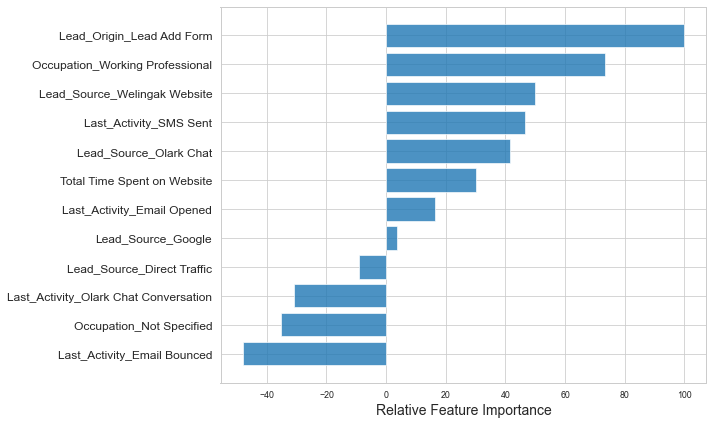

In [171]:
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(10,6))
ax =  fig.add_subplot(1, 1, 1)
ax.barh(pos, feature_relevance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
ax.set_yticks(pos)
ax.set_yticklabels(np.array(rfe_selected_features)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

###### Fromt the above plot and data, we can find out the TOP  3 features, using the feature_relevance dataframe

In [172]:
pd.DataFrame(feature_relevance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
9,Lead_Origin_Lead Add Form,100.000000
11,Occupation_Working Professional,73.525731
4,Lead_Source_Welingak Website,49.771207


###### To find the log odds we can use the below formula:

### Conclusion

###### After trying several models, we finally chose this Model, becuase it fullfilled the below criteria

- <font color = blue> All variables have p-value < 0.05.
-  All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map as well.
-  The overall accuracy of 79% at a probability threshold of <bold> 0.36 </bold> on the test dataset is also acceptable.</font>

###### <font color = blue> We can also tweak the  probability threshold value with in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model, based on the business requirements. </font>
    
###### <font color = blue> High Sensitivity ensures that the leads who are likely to be convertted are correctly predicted where as high Specificity will ensure that leads that are on the cut-off of the probability of getting converted or not are not selected. </font>